**GROUP 20 - LAB 10**

Diaz Cajamarca, Daniel Felipe - ddiazcaj@unal.edu.co

Forero Briceño, Brandon Styven - bforerob@unal.edu.co

Gallegos Rubio, Gabriela - ggallegosr@unal.edu.co



# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
import numpy as np 
import cmath 
from numpy.testing import assert_allclose

import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#"""Find a root of $f(x) = 0$ via Newton's iteration starting from x0.   
 #   Parameters
  #  f : callable
   #     The function to find a root of.
    #fder : callable
     #   The derivative of `f`.
    #x0 : float
    #    Initial value for the Newton's iteration.
    #eps : float
    #    The target accuracy. 
    #    The iteration stops when the distance between successive iterates is below `eps`.
    #    Default is 1e-5.
    #maxiter : int
    #    The maximum number of iterations (default is 1000.)
    #    Iterations terminate if the number of iterations exceeds `maxiter`.
    #    This parameter is only needed to avoid infinite loops if iterations wander off.
        
    #Returns
    #-------
    #x : float
    #    The estimate for the root.
    #niter : int
    #    The number of iterations.
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):

    var_x = x0 - f(x0) / fder(x0) #first item
    iteration_count = 0
    
    while (abs(var_x - x0) > eps): #condition to run through till maximum number of iterations
        x0 = var_x
        var_x = x0 - f(x0) / fder(x0)
        iteration_count += 1 
        
        if iteration_count > maxiter:
            break
    
    return var_x, iteration_count


### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [3]:
f = lambda x: x**2 - 1
fder = lambda x: 2 * x
root, iteration_count = newton_iteration(f, fder, 0.05)

print('Raíz:', root)
print('Conteo de iteraciones', iteration_count)


Raíz: 1.0000000000149214
Conteo de iteraciones 7


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [4]:
def newton_iteration(f, f_prime, x0, m, eps=1e-5, maxiter=1000):
    var_x = x0 - m * (f(x0) / f_prime(x0))
    iteration_count = 0

    while abs(var_x - x0) > eps:
        x0 = var_x
        var_x = x0 - m * (f(x0) / f_prime(x0))
        iteration_count += 1

        if iteration_count > maxiter:
            break

    return var_x, iteration_count

def test_convergence():
    f = lambda x: (x**2 - 1)**2
    f_prime = lambda x: 4 * x * (x**2 - 1)
    x0 = 1.5  # Initial guess
    epsilon = 1e-5  # Convergence criterion
    max_iterations = 1000  # Maximum number of iterations

    multiplicities = [1, 2, 3, 4, 5]  # Iteraciones de m

    for m in multiplicities:
        root, iterations = newton_iteration(f, f_prime, x0, m, epsilon, max_iterations)

        if iterations >= max_iterations:
            print(f"No se alcanza la convergencia para m = {m}")
        else:
            print(f"Convergencia alcanzada para m  = {m} en {iterations} iteraciones")

test_convergence()

Convergencia alcanzada para m  = 1 en 16 iteraciones
Convergencia alcanzada para m  = 2 en 3 iteraciones
Convergencia alcanzada para m  = 3 en 16 iteraciones
No se alcanza la convergencia para m = 4
No se alcanza la convergencia para m = 5


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

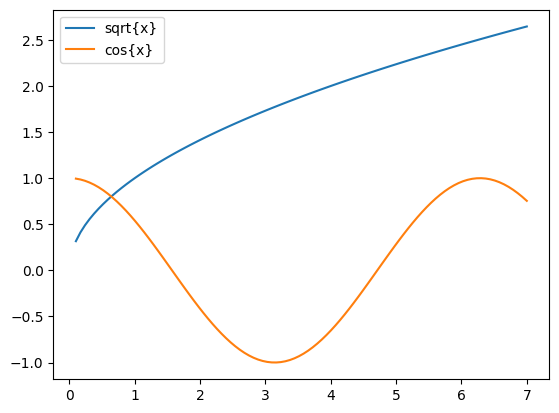

In [5]:
x = np.linspace(0.1, 7, 100)

plt.plot(x, np.sqrt(x), label='sqrt{x}')
plt.plot(x, np.cos(x), label='cos{x}')

plt.legend()
plt.show()

In [6]:
f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1 / (2 * np.sqrt(x)) - np.sin(x)

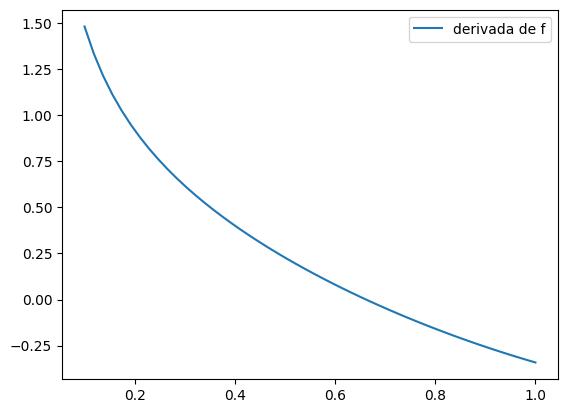

In [7]:
x = np.linspace(0.1, 1, 50)

plt.plot(x, fder(x), label='derivada de f')
plt.legend()
plt.show()

In [8]:
def newton_iteration_fixed_poinit(f, fder, x0, alpha, eps=1e-5, maxiter=1000):
    
    nx = x0 - alpha * f(x0)
    cont = 0
    
    while (abs(nx - x0) > eps): 
        x0 = nx
        nx = x0 - alpha * f(x0)
        cont += 1 
        
        if cont > maxiter: 
            nx = 'Nan'
            break
    
    return nx, cont


x0 = 2 / 3

for i in [0.1, 0.5, 1, 1.5]: 
    root, cont = newton_iteration_fixed_poinit(f, fder, x0, i)
    print(float(i),'   ,    ', root,'   ,   ', cont)

0.1    ,     0.6417846268333629    ,    44
0.5    ,     0.6417193751949732    ,    8
1.0    ,     0.6417136823927276    ,    6
1.5    ,     0.6417185143046147    ,    47


# Part III. Newton's fractal.

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

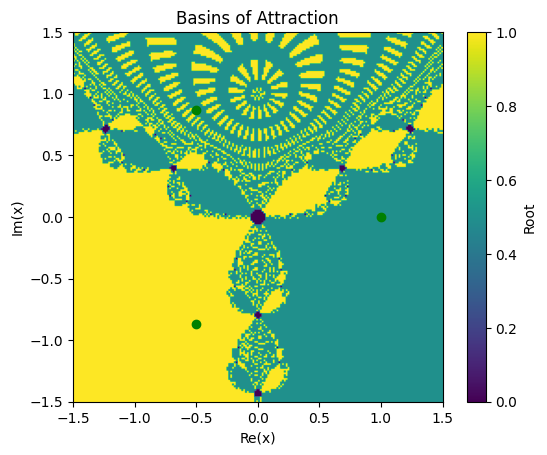

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

def newton_frac(x0):
    eps = 1e-5
    maxiter = 1000
    nx = x0 - (x0**3 - 1)/(3*x0**2)
    cont = x0
    
    for _ in range(maxiter):
        if abs(nx - cont) <= eps:
            break
        if abs(nx - cont) > 1e2:
            return 0
        cont = nx
        nx = nx - (nx**3 - 1)/(3*nx**2)
        
    if abs(nx - cmath.exp(complex(0, 2*np.pi*1/3))) < abs(nx - cmath.exp(complex(0, 2*np.pi*2/3))):
        return 1
    else:
        return 2

x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)

colormap = np.zeros((len(x), len(y)))

for i, x0 in enumerate(x):
    for j, y0 in enumerate(y):
        fr = newton_frac(complex(x0, y0))
        colormap[j, i] = fr

plt.imshow(colormap.T, extent=[-1.5, 1.5, -1.5, 1.5], origin='lower', cmap='viridis')

roots = [cmath.exp(complex(0, 2*np.pi*k/3)) for k in range(3)]
roots_x = [z.real for z in roots]
roots_y = [z.imag for z in roots]

plt.scatter(roots_x, roots_y, c='g')

plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.title('Basins of Attraction')
plt.colorbar(label='Root')

plt.show()